In [2]:
%%capture
import postproamrwind
from pylab import *
import numpy as np
%matplotlib inline

In [24]:
# Timining of runs
from functools import reduce

tAMR = "12:03:27"
AMRsec=reduce(lambda sum, d: sum * 60 + int(d), tAMR.split(":"), 0)

tNalu = "20:35:37"
Nalusec=reduce(lambda sum, d: sum * 60 + int(d), tNalu.split(":"), 0)

print(1-double(AMRsec)/Nalusec)

0.414502879804


In [3]:
AMRdir='/ascldap/users/lcheung/nscratch/2020/amrruns/DanAero_neutral_skybridge1'
GODdatfile=AMRdir+'/line_plot.txt'
t1=15000
t2=20000

In [4]:
# Load the AMR-wind data
Nz    = 192
Nvars = 23
tavg=postproamrwind.avglineplot(GODdatfile, t1,t2,[Nz, Nvars])
zG, uG, vG, wG, uuG, vvG, wwG = postproamrwind.splitdat(tavg)

30002 15000.500000
40000 19999.500000
5000


In [5]:
# Load the Nalu Data
NaluDir = '/gpfs1/lcheung/2020/IEATask29/precursor/REF1/neutral_compare.2/prof15000-20000/'
#NaluDir = '/gpfs1/lcheung/2020/IEATask29/precursor/REF1/neutral_compare.2/'
NaluU   = loadtxt(NaluDir+'/Vprof.dat')
NaluTKE = loadtxt(NaluDir+'/TKEprof.dat')

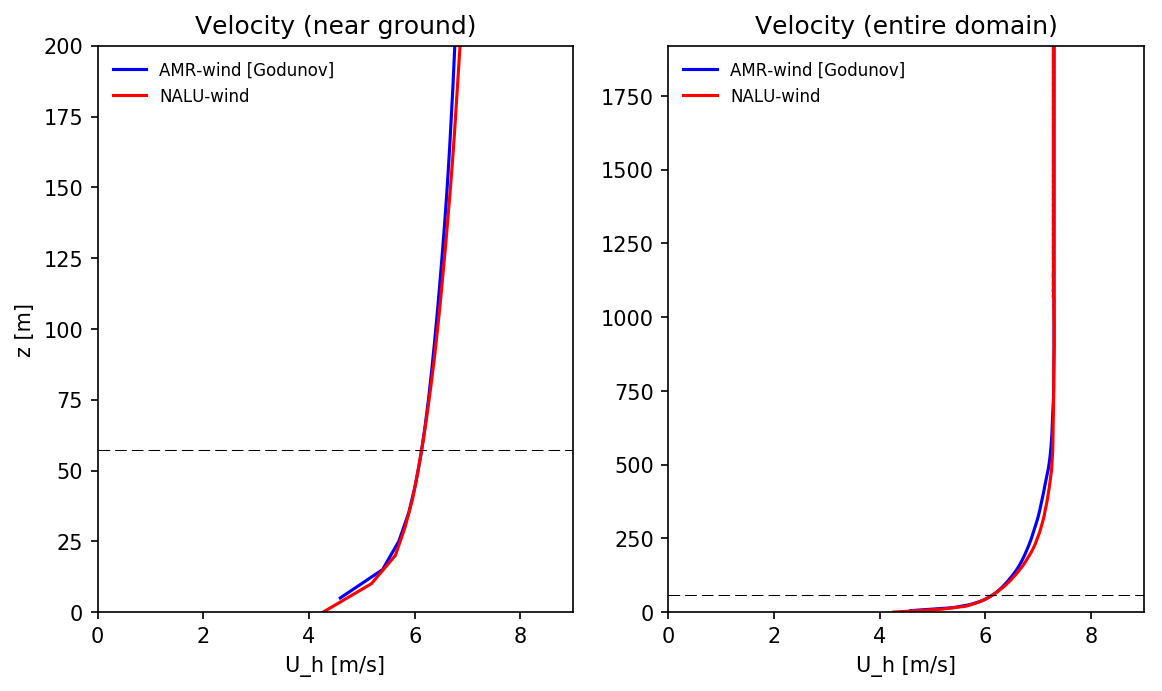

In [11]:
# Compare the velocity profiles
figure(figsize=(9,5),dpi=150)
UhorizG = np.sqrt(uG*uG + vG*vG)
UmagG   = np.sqrt(uG*uG + vG*vG + wG*wG)
#UhorizM=np.sqrt(uM*uM+vM*vM)

NaluUhoriz = np.sqrt(NaluU[:,1]**2 + NaluU[:,2]**2)
NaluZ     = NaluU[:,0]
yHH       = 57.19

# Make plot 1
subplot(121)
plot(UmagG, zG, 'b', label='AMR-wind [Godunov]')
#plot(UhorizM, zM, 'b--', label='AMR-wind [MOL]')
plot(NaluUhoriz, NaluZ, 'r', label='NALU-wind')
ylim([0,200]);
xlim([0,9])
axhline(yHH, 0, 10, linestyle='--', color='k', linewidth=0.5)
xlabel('U_h [m/s]');
ylabel('z [m]');
title('Velocity (near ground)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

# Make plot 2
subplot(122)
plot(UhorizG, zG, 'b', label='AMR-wind [Godunov]')
#plot(UhorizM, zM, 'b--', label='AMR-wind [MOL]')
plot(NaluUhoriz, NaluZ, 'r', label='NALU-wind')
ylim([0,1920]);
xlim([0,9])
axhline(yHH, 0, 10, linestyle='--', color='k', linewidth=0.5)
xlabel('U_h [m/s]');
#ylabel('z [m]');
title('Velocity (entire domain)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

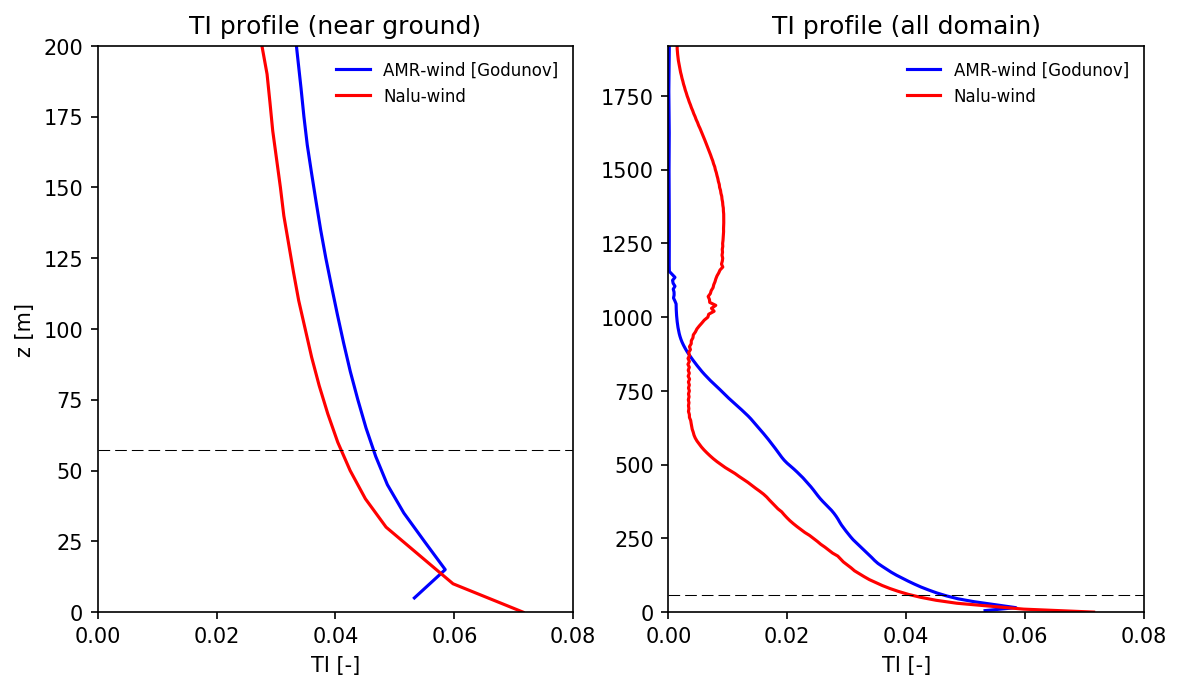

In [14]:
# Calculate TI
TKEG = 0.5*(uuG +vvG +wwG)
TIG  = sqrt(2.0/3.0*TKEG)/UhorizG
#TKEM = 0.5*(uuM+vvM+wwM)
#TIM  = sqrt(2.0/3.0*TKEM)/UhorizM

NTKE = 0.5*(NaluTKE[:,1] +  NaluTKE[:,2] +  NaluTKE[:,3])
NaluTI = sqrt(2.0/3.0*NTKE)/NaluUhoriz

# Compare the TI profiles
figure(figsize=(9,5),dpi=150)

# Make plot 1
subplot(121)
plot(TIG, zG, 'b-', label='AMR-wind [Godunov]')
#plot(TIM, zM, 'b--',label='AMR-wind [MOL]')
#plot(sqrt(2.0/3.0*NaluTKE[:,4])/NaluUhoriz, NaluTKE[:,0],'r', label='Nalu-wind' )
plot(NaluTI, NaluZ,'r', label='Nalu-wind' )
ylim([0,200]);
xlim([0, 0.08])
axhline(yHH, 0, 1, linestyle='--', color='k', linewidth=0.5)
ylabel('z [m]')
xlabel('TI [-]')
title('TI profile (near ground)')
legend(loc='upper right',prop={'size': 8}, frameon=False)

# Make plot 2
subplot(122)
plot(TIG, zG, 'b-', label='AMR-wind [Godunov]')
#plot(TIM, zM, 'b--',label='AMR-wind [MOL]')
plot(sqrt(2.0/3.0*NaluTKE[:,4])/NaluUhoriz, NaluTKE[:,0],'r', label='Nalu-wind' )
ylim([0,1920]);
xlim([0, 0.08])
axhline(yHH, 0, 1, linestyle='--', color='k', linewidth=0.5)
xlabel('TI [-]')
title('TI profile (all domain)')
legend(loc='upper right',prop={'size': 8}, frameon=False)

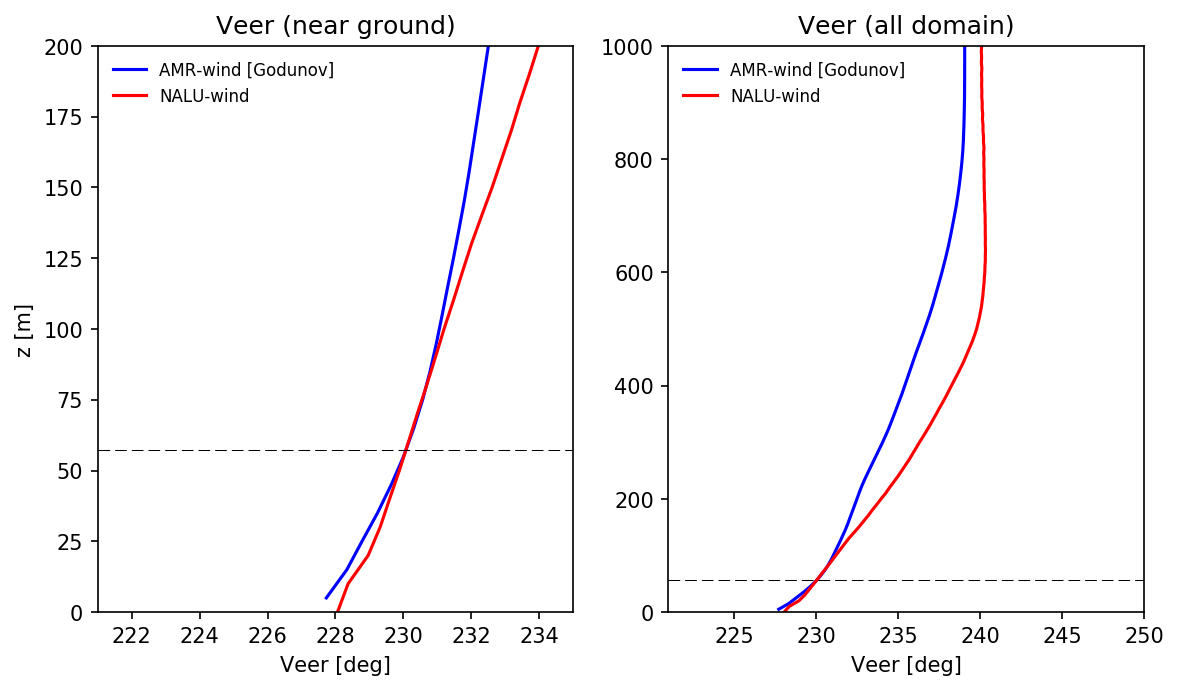

In [15]:
# Calculate veer
veerG = 270-np.arctan2(vG, uG)*180/math.pi
#veerM = 270-np.arctan2(vM, uM)*180/math.pi
veerN = 270-np.arctan2(NaluU[:,2], NaluU[:,1])*180/math.pi

# Compare the veer profiles
figure(figsize=(9,5),dpi=150)

# Make plot 1
subplot(121)
plot(veerG, zG, 'b', label='AMR-wind [Godunov]')
#plot(veerM, zM, 'b--', label='AMR-wind [MOL]')
plot(veerN, NaluU[:,0], 'r', label='NALU-wind')
ylim([0,200]);
xlim([221,235])
axhline(yHH, 0, 360, linestyle='--', color='k', linewidth=0.5)
xlabel('Veer [deg]');
ylabel('z [m]');
title('Veer (near ground)')
legend(loc='upper left',prop={'size': 8}, frameon=False)

# Make plot 2
subplot(122)
plot(veerG, zG, 'b', label='AMR-wind [Godunov]')
#plot(veerM, zM, 'b--', label='AMR-wind [MOL]')
plot(veerN, NaluU[:,0], 'r', label='NALU-wind')
ylim([0,1000]);
xlim([221,250])
axhline(yHH, 0, 360, linestyle='--', color='k', linewidth=0.5)
xlabel('Veer [deg]');
#ylabel('z [m]');
title('Veer (all domain)')
legend(loc='upper left',prop={'size': 8}, frameon=False)